# Estudio de los ataques de tiburones entre los años comprendidos entre el 1721 y el 2018.

## Queremos ver si hay más casos de ataques según la especie y analizar cuántos de esos ataques han resultado fatales. 
## Además veremos el tipo de ataque y si hay alguno que sucede con más frecuencia. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_ori=pd.read_csv('/Users/mar/data/Proyecto-Shark-Mar-S-nchez-de-Salas/Dataset_proyecto_Sharks/datashark.csv', sep=',', encoding='latin-1')

In [3]:
data= data_ori.copy()  #Para trabajar con una copia y poder comparar si fuera necesario
data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Información básica sobre la tabla de datos.

In [4]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [5]:
data.shape 

(25723, 24)

# Arreglar los nombres de columnas. Quitar espacios.

In [6]:
columnas=list(data.columns)
columnas_bien= [nombre.replace(' ','') for nombre in columnas]
columnas_bien

['CaseNumber',
 'Date',
 'Year',
 'Type',
 'Country',
 'Area',
 'Location',
 'Activity',
 'Name',
 'Sex',
 'Age',
 'Injury',
 'Fatal(Y/N)',
 'Time',
 'Species',
 'InvestigatororSource',
 'pdf',
 'hrefformula',
 'href',
 'CaseNumber.1',
 'CaseNumber.2',
 'originalorder',
 'Unnamed:22',
 'Unnamed:23']

In [7]:
data.columns=columnas_bien #Ya tiene las columnas bien escritas

# Borrar duplicados

In [8]:
data.duplicated()
data.drop_duplicates(inplace=True)

In [9]:
data.shape, data_ori.shape

((6312, 24), (25723, 24))

In [10]:
data.duplicated().any() #Ya no hay duplicados. 

False

# Mirar nulos

In [11]:
nan_cols= data.isna().sum()
nan_cols[nan_cols>0]

CaseNumber                 2
Date                      10
Year                      12
Type                      14
Country                   60
Area                     465
Location                 550
Activity                 554
Name                     220
Sex                      575
Age                     2841
Injury                    38
Fatal(Y/N)               549
Time                    3364
Species                 2848
InvestigatororSource      27
pdf                       10
hrefformula               11
href                      10
CaseNumber.1              10
CaseNumber.2              10
originalorder              3
Unnamed:22              6311
Unnamed:23              6310
dtype: int64

In [12]:
diccna=dict(nan_cols)
diccna

{'CaseNumber': 2,
 'Date': 10,
 'Year': 12,
 'Type': 14,
 'Country': 60,
 'Area': 465,
 'Location': 550,
 'Activity': 554,
 'Name': 220,
 'Sex': 575,
 'Age': 2841,
 'Injury': 38,
 'Fatal(Y/N)': 549,
 'Time': 3364,
 'Species': 2848,
 'InvestigatororSource': 27,
 'pdf': 10,
 'hrefformula': 11,
 'href': 10,
 'CaseNumber.1': 10,
 'CaseNumber.2': 10,
 'originalorder': 3,
 'Unnamed:22': 6311,
 'Unnamed:23': 6310}

## Hacer histograma con columnas y numero de nulos

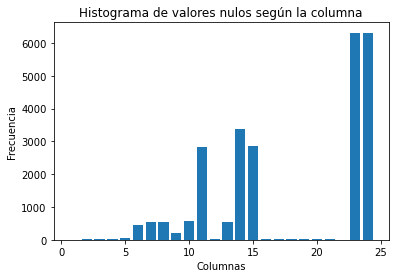

In [13]:
from matplotlib import pyplot as plt
ejex=[i for i in range(1,25)]
histogram_na = plt.bar(x=ejex, height=diccna.values())
plt.title('Histograma de valores nulos según la columna')
plt.xlabel('Columnas')
plt.ylabel('Frecuencia')
plt.show();


## Borrar las filas con mas de 5 valores nulos

In [14]:
data.shape, data_ori.shape

((6312, 24), (25723, 24))

In [15]:
a=data.isnull().sum(axis=1)

In [16]:
data_a=pd.DataFrame(a)

In [17]:
data_a

,0
0,2
1,3
2,3
3,4
4,4
...,...
6307,22
6308,22
6309,23
8702,24


In [18]:
bad_indices=data_a[data_a[0]>5].index
len(bad_indices)

978

In [19]:
data.drop(bad_indices, axis=0, inplace=True)  #ya hemos eliminado las filas con más de 5 valores nulos. 

In [20]:
data.shape, data_ori.shape

((5334, 24), (25723, 24))

# Unificar columnas necesarias para el estudio.

### Dado que el estudio se va a centrar en relacionar el numero de ataques según la especie, si ha muerto o no la persona y el "motivo" del ataque con el valor 'type', voy a limpiar y analizar las siguientes columnas: Type, Fatal(T/N) y Species.

## Columna Type

In [21]:
data['Type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       nan, 'Boat', 'Sea Disaster', 'Boatomg'], dtype=object)

In [22]:
data['Type'].replace(['Invalid','Questionable','Boat','Boatomg'],
                    ['Unknown','Unknown','Boating','Boating'],
                    inplace = True)



In [23]:
data['Type'].value_counts()  #Ya hemos quitado los valores inconsistentes.

Unprovoked      4071
Provoked         519
Unknown          380
Boating          253
Sea Disaster     110
Name: Type, dtype: int64

## Columna Species

In [24]:
len(data['Species'].value_counts())  #Hay 1493 valores diferentes que refieren a la especie.


1496

In [25]:
#pd.options.display.max_rows=None

In [26]:
#sustituir nan por "unknown"
data['Species'].fillna('unknown', inplace=True)

In [27]:
#Lista de especies que encontramos
species_list=['white Shark','tiger shark','bull shark','webbegong shark','blacktip shark','blue shark','whaler shark','mako shark','raggedtooth shark','nurse shark','zambesi shark','hammer head shark','sandtiger shark','basking shark','lemon shark','spinner shark','whitetip shark','angel shark','grey reef shark','galapagos shark','sevengill shark','caribbean reefshark']


In [28]:
#Lista de los valores en la columna species
species_values=data['Species'].values.tolist()
len(species_values)


5334

In [29]:
#Función para sustituír el nombre de la tabla de datos por el nombre correcto y así unificar los datos.
species_col=[]
for i in species_values:
    for j in species_list:
        if j.lower() in i.lower():
            #print(j)
            #print(i)
            species_col.append(j)
            break
    else:
        species_col.append('unknown')
#species_col

### Cambiar los valores de la columna species con los valores nuevos de species_col

In [30]:
len(species_col) ,len(data['Species'])

(5334, 5334)

In [31]:
data['Species']=species_col

In [32]:
data['Species'].value_counts()

unknown              3767
white Shark           607
tiger shark           271
bull shark            170
nurse shark            93
whaler shark           65
blacktip shark         62
mako shark             50
spinner shark          43
raggedtooth shark      41
blue shark             37
lemon shark            33
zambesi shark          25
whitetip shark         22
grey reef shark        17
sevengill shark        11
galapagos shark         7
basking shark           7
angel shark             6
Name: Species, dtype: int64

## Columna que visualiza si el ataque ha sido o no fatal.

In [33]:
data['Fatal(Y/N)'].value_counts()

N          3887
Y          1054
UNKNOWN      22
 N            7
M             1
2017          1
Name: Fatal(Y/N), dtype: int64

In [34]:
data['Fatal(Y/N)'].replace([' N','UNKNOWN','M','2017'],
                    ['N','Unknown','Unknown','Unknown'],
                    inplace = True)



In [35]:
data['Fatal(Y/N)'].value_counts()

N          3894
Y          1054
Unknown      24
Name: Fatal(Y/N), dtype: int64

# Ya hemos limpiado las tres columnas necesarias para el estudio. Vamos a terminar de rellenar los valores nulos del resto de la dataset.

In [36]:
nan_cols= data.isna().sum()
nan_cols[nan_cols>0]

Type                       1
Country                    2
Area                     103
Location                 144
Activity                 153
Name                      24
Sex                      217
Age                     1929
Injury                     2
Fatal(Y/N)               362
Time                    2422
InvestigatororSource       5
hrefformula                1
Unnamed:22              5333
Unnamed:23              5332
dtype: int64

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseNumber            5334 non-null   object 
 1   Date                  5334 non-null   object 
 2   Year                  5334 non-null   float64
 3   Type                  5333 non-null   object 
 4   Country               5332 non-null   object 
 5   Area                  5231 non-null   object 
 6   Location              5190 non-null   object 
 7   Activity              5181 non-null   object 
 8   Name                  5310 non-null   object 
 9   Sex                   5117 non-null   object 
 10  Age                   3405 non-null   object 
 11  Injury                5332 non-null   object 
 12  Fatal(Y/N)            4972 non-null   object 
 13  Time                  2912 non-null   object 
 14  Species               5334 non-null   object 
 15  InvestigatororSource 

### Buscar las columnas numericas y sustituir el nulo por '0'.

In [38]:
num_data =data.select_dtypes(exclude='object')

num_data.columns

Index(['Year', 'originalorder'], dtype='object')

In [39]:
data['Year'].fillna(0, inplace=True)
data['originalorder'].fillna(0, inplace=True)

### Como el resto de las columnas son tipo objeto vamos a sustituir el nulo por 'unknown'.

In [40]:
num_data =data.select_dtypes(exclude='float64')

num_data.columns

Index(['CaseNumber', 'Date', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal(Y/N)', 'Time', 'Species',
       'InvestigatororSource', 'pdf', 'hrefformula', 'href', 'CaseNumber.1',
       'CaseNumber.2', 'Unnamed:22', 'Unnamed:23'],
      dtype='object')

In [41]:
data.fillna('unknown', inplace=True)
nan_cols= data.isna().sum()
nan_cols[nan_cols>0]

Series([], dtype: int64)

## Ya no quedan valores nulos en el dataset. Vamos a comenzar con el analisis estadístico.

### Se quiere comparar el numero de ataques segun la especie y ver si han muerto o no. Además vamos a ver el tipo de ataque que ha sido. 

## Número de ataques según especie.

### Como cada fila representa un ataque, simplemente sería ver el número de filas para cada especie: 

In [42]:
data['Species'].value_counts()

unknown              3767
white Shark           607
tiger shark           271
bull shark            170
nurse shark            93
whaler shark           65
blacktip shark         62
mako shark             50
spinner shark          43
raggedtooth shark      41
blue shark             37
lemon shark            33
zambesi shark          25
whitetip shark         22
grey reef shark        17
sevengill shark        11
galapagos shark         7
basking shark           7
angel shark             6
Name: Species, dtype: int64

ValueError: shape mismatch: objects cannot be broadcast to a single shape

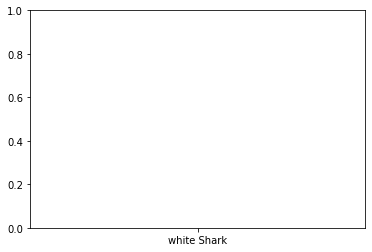

In [61]:
from matplotlib import pyplot as plt
ejex=data['Species'].value(count)
histogram_na = plt.bar(x=ejex, height=diccna.values())
plt.title('Histograma de valores nulos según la columna')
plt.xlabel('Columnas')
plt.ylabel('Frecuencia')
plt.show();

In [43]:
total=5334
unknown=3767
total_con_especie= total-unknown
suma_3_primeros=607+271+170
#Ver el % de los casos que han sido por los tres primeros:
(suma_3_primeros/total_con_especie)*100

66.87938736439055

#### Total con nombre de especie=1567
#### Total 3 primeros= 1048

### Vemos que el mayor número de ataques es por tiburón blanco seguido del tiburón tigre y luego el tiburón toro. La suma de los ataques de esas tres especies representan el 67% de los casos de ataques.

## Ver el % de casos de ataques que han resultado mortales. 

In [44]:
data['Fatal(Y/N)'].value_counts()


N          3894
Y          1054
unknown     362
Unknown      24
Name: Fatal(Y/N), dtype: int64

In [45]:
data['Fatal(Y/N)'].replace('unknown','Unknown',inplace = True)

In [46]:
data['Fatal(Y/N)'].value_counts()

N          3894
Y          1054
Unknown     386
Name: Fatal(Y/N), dtype: int64

In [47]:
total= 3894+1054
fatales=(1054/total)*100
fatales

21.30153597413096

In [48]:
salvades=100-fatales
salvades

78.69846402586904

## El porcentaje de ataques que han resultado fatales es el 21%

## Ahora vamos a relacionar la columna del tipo de ataque y la de muertes.
### Para poder ver si existe correlación vamos a crear un nuevo data set dandole valores numéricos a los tipos y al hecho de si ha resultado fatal o no.

#### Fatal=0, Salvada=1, 
#### Respecto a los tipos:
       #### Unprovoked=0     
       #### Provoked=1        
       #### Unknown=2         
       #### Boating=3          
       #### Sea Disaster=4

In [49]:

fatal_values=[]
for i in data['Fatal(Y/N)'].tolist():
    if i=='Y':
        fatal_values.append(0)
    elif i=='N':
        fatal_values.append(1)
    else:
        fatal_values.append(None)
    


In [50]:
data_analisis=pd.DataFrame(fatal_values)

In [51]:
len(data_analisis)

5334

In [52]:
lista_tipos=data['Type'].tolist()
lista_tipos
tipo_values=[]
for i in lista_tipos:
    if i=='Unprovoked':
        tipo_values.append(0)
    elif i=='Provoked':
        tipo_values.append(1)
    elif i=='Unknown':
        tipo_values.append(2)
    elif i=='Boating':
        tipo_values.append(3)
    else:
        tipo_values.append(4)


In [53]:
#Añadirlo al dataset nuevo

data_analisis['Type']=tipo_values
data_analisis.rename({0:'Fatal'},axis=1, inplace=True)
#data_analisis


In [54]:
#Ver si hay correlación entre el tipo de ataques y si han resultado fatales o no.
data_analisis['Fatal'].corr(data_analisis['Type'])

0.02096313160490206

#### Vemos que el % de correlación es muy bajo así que podemos conluír (a falta de una prueba de error) que no tienen correlación el tipo de ataque y las muertes.

##### Quizás este análisis no tiene ningún tipo de rigor científico pero este trabajo es de limpieza de una base de datos y análisis básicos de estos. 

## Se crea una duda de ver el rango de años en los que ha ocurrido estos ataques. 

### Teniendo en cuenta que los registros comenzaron en el 1721 y terminaron en el 2018, esta tabla recopila los datos de hace 297 años. Hay 25723 filas.

In [55]:
#Años del registro
2018- 1721

297

In [56]:
len(data_ori['Case Number'])

25723

### En 297 años ha habido 25723 ataques.

In [57]:
25723/297

86.60942760942761

### 87 casos al año de los cuales el 21% han resultado fatales.

In [58]:
87*0.21

18.27

### 18 ataques mortales al año por parte de tiburones. 

# CONCLUSIONES

## Tras visualizar y analizar varias variables relacionadas con los ataques de diferentes tiburones podemos concluír que el 21% de los ataques resultan mortales, siendo estos 18 al año.

## Además hemos visto que la mayoría de todos los ataques es por la especie de tiburon blanco seguidos que por el tiburón tigre y luego el tiburón toro. 

## También hemos visto que el motivo mayoritario de los ataques son de tipo provocado.

## Esto nos hace caer en la conclusión de que el tiburón quizás no sea tan peligroso como nos han hecho ver. La fama que tiene el tiburón posiblemente se debe a que durante muchos años se han hecho películas de ataques mortales a tiburones, documentales de mordidas, y siempre que vemos imágenes en la tele de tiburones es con una música escalofriante de fondo.

## Sin embargo, por poner un ejemplo, la OMS advierte de entre 10.000 y 20.000 muertes al año (versus las 18 por tiburón) por estar en contacto con una especie de caracol de agua dulce, que puede portar un parásito que produce esquistosomiasis, una enfermedad mortal. Quizás el tiburón no es ahora tan peligroso como pensábamos.






In [60]:
#Export to csv
data.to_csv('data_limpio.csv')